# ***(1) Importing Libraries:-***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

# **(2) Load data:-**

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape,"***********",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***********', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_label = [ "T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

In [ ]:
class_label

['T_shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

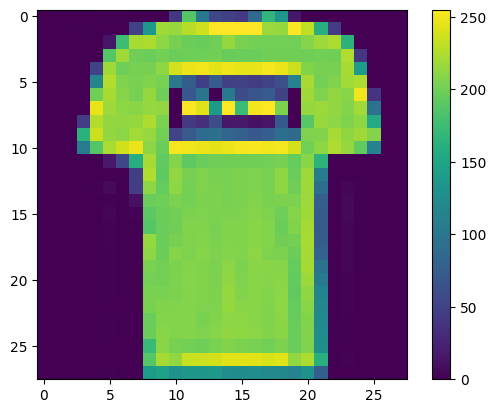

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

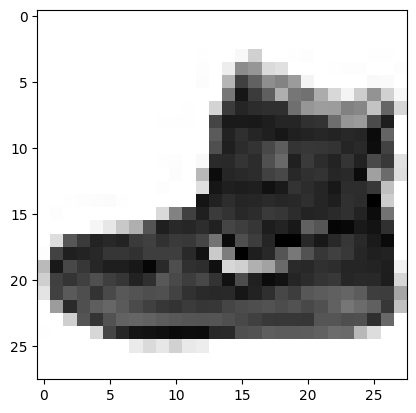

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

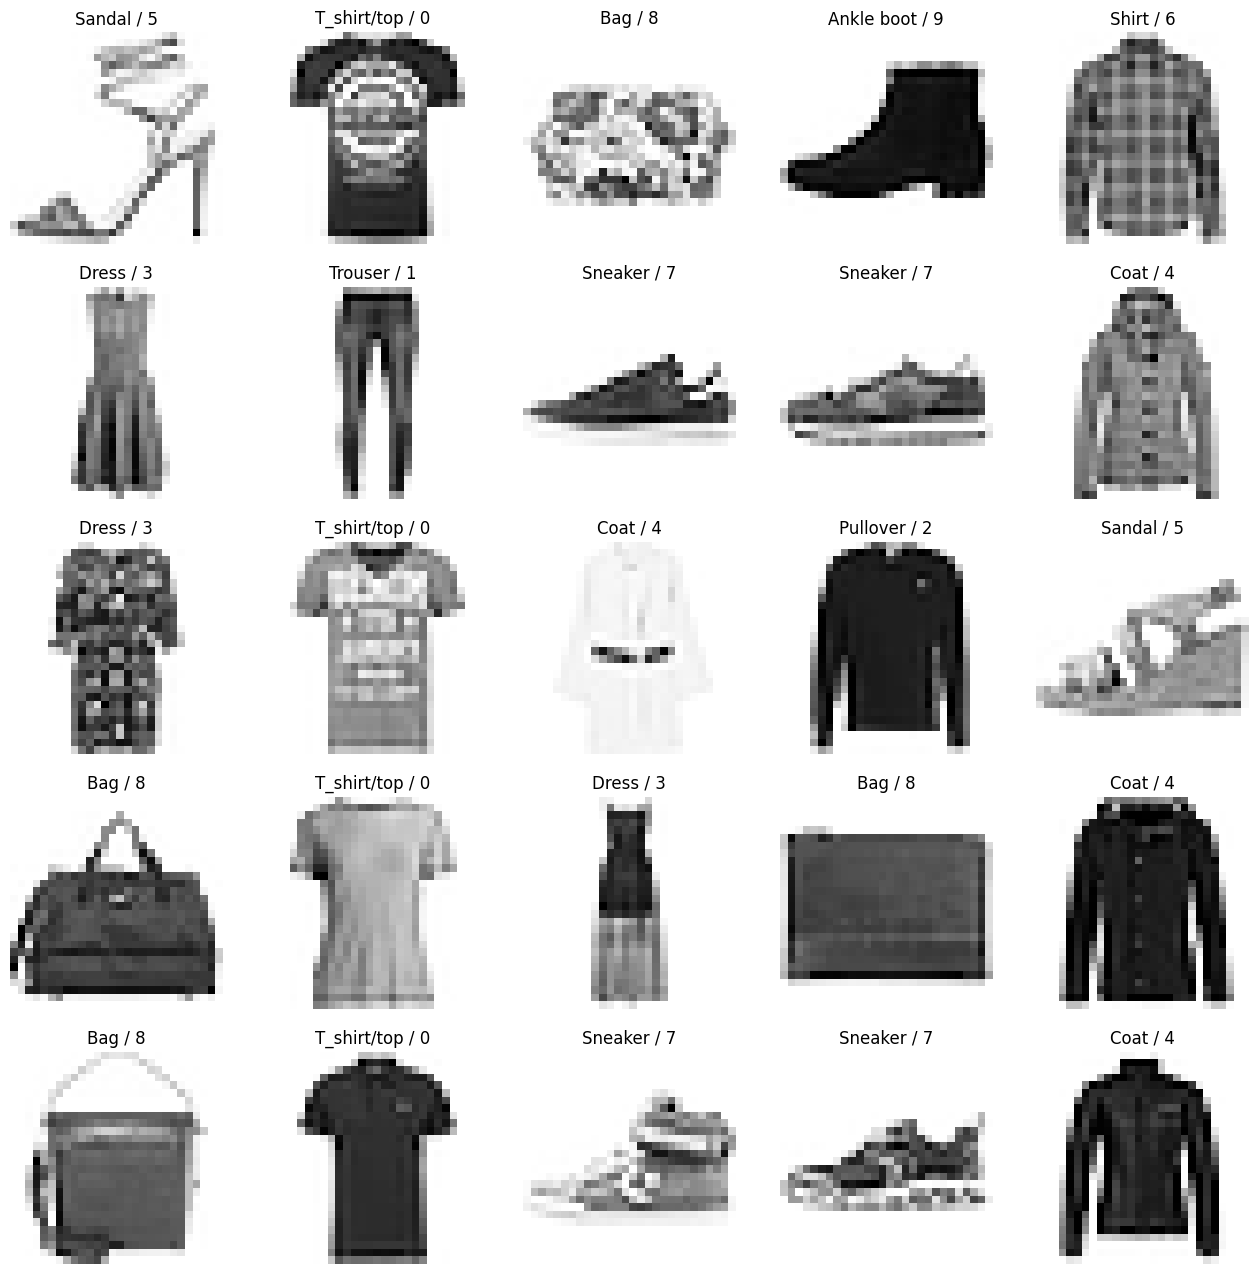

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title("{} / {}".format(class_label[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

# **(3) Building the CNN model:-**

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/20
94/94 [==============================] - 28s 291ms/step - loss: 0.6438 - accuracy: 0.7836 - val_loss: 0.4164 - val_accuracy: 0.8574
Epoch 2/20
94/94 [==============================] - 26s 276ms/step - loss: 0.3750 - accuracy: 0.8691 - val_loss: 0.3627 - val_accuracy: 0.8749
Epoch 3/20
94/94 [==============================] - 27s 286ms/step - loss: 0.3276 - accuracy: 0.8850 - val_loss: 0.3310 - val_accuracy: 0.8845
Epoch 4/20
94/94 [==============================] - 27s 286ms/step - loss: 0.2968 - accuracy: 0.8948 - val_loss: 0.3139 - val_accuracy: 0.8899
Epoch 5/20
94/94 [==============================] - 27s 284ms/step - loss: 0.2742 - accuracy: 0.9024 - val_loss: 0.3003 - val_accuracy: 0.8957
Epoch 6/20
94/94 [==============================] - 27s 285ms/step - loss: 0.2573 - accuracy: 0.9089 - val_loss: 0.2869 - val_accuracy: 0.8998
Epoch 7/20
94/94 [==============================] - 26s 274ms/step - loss: 0.2452 - accuracy: 0.9130 - val_loss: 0.2810 - val_accuracy: 0.9011

In [ ]:
y_pred=model.predict(x_test)
y_pred.round(2)

313/313 [==============================] - 3s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2729 - accuracy: 0.9096


[0.2728726267814636, 0.909600019454956]

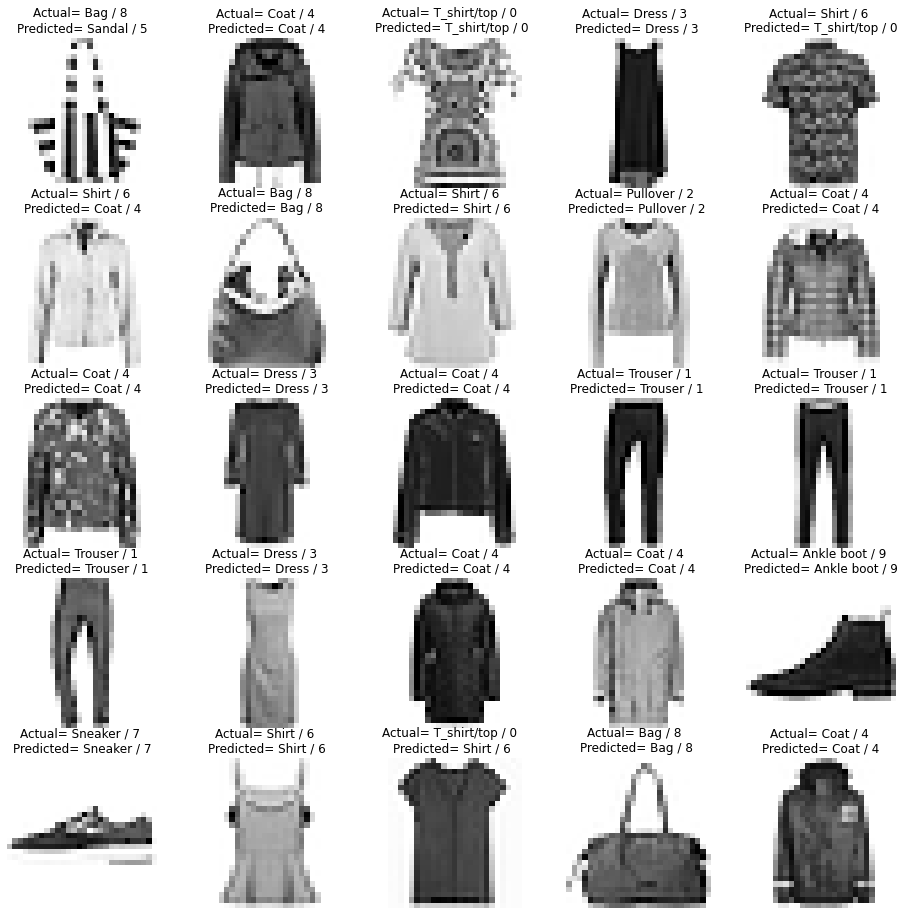

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(1000,2000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title("Actual= {} / {} \nPredicted= {} / {}".format(class_label[y_test[i]],y_test[i],class_label[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [3]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[ np.argmax(label) for label in y_pred ]
cm=confusion_matrix(y_test,y_pred_labels)

NameError: ignored

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T_shirt/top       0.79      0.91      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.91      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.88      0.83      0.86      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.83      0.68      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



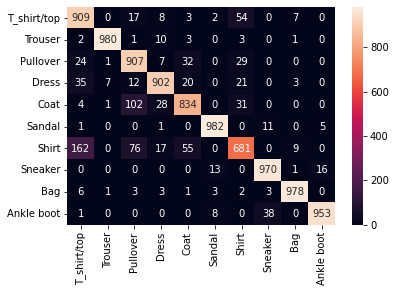

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_label, yticklabels=class_label)

from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_label)
print(cr)


In [ ]:
model.save("Fashion_cnn_model.h5")

# **Building 2 complex CNN model:-**

In [ ]:
cnn_model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

# compile The model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""###### very complex model"""
cnn_model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10,activation='softmax')
])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(x_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(x_test, y_test)

Epoch 1/20
94/94 [==============================] - 28s 290ms/step - loss: 1.0081 - accuracy: 0.6306 - val_loss: 0.5551 - val_accuracy: 0.7847
Epoch 2/20
94/94 [==============================] - 27s 289ms/step - loss: 0.5319 - accuracy: 0.7993 - val_loss: 0.4490 - val_accuracy: 0.8324
Epoch 3/20
94/94 [==============================] - 34s 362ms/step - loss: 0.4403 - accuracy: 0.8393 - val_loss: 0.3877 - val_accuracy: 0.8577
Epoch 4/20
94/94 [==============================] - 33s 355ms/step - loss: 0.3891 - accuracy: 0.8582 - val_loss: 0.3584 - val_accuracy: 0.8697
Epoch 5/20
94/94 [==============================] - 32s 343ms/step - loss: 0.3546 - accuracy: 0.8706 - val_loss: 0.3399 - val_accuracy: 0.8727
Epoch 6/20
94/94 [==============================] - 31s 335ms/step - loss: 0.3334 - accuracy: 0.8784 - val_loss: 0.3367 - val_accuracy: 0.8734
Epoch 7/20
94/94 [==============================] - 30s 324ms/step - loss: 0.3090 - accuracy: 0.8873 - val_loss: 0.3140 - val_accuracy: 0.8866

[0.44860267639160156, 0.9038000106811523]